In [1]:
import glob
import pandas as pd
import numpy as np

import os
import re

In [2]:
attack = "crownibp"

In [3]:
results_folder = rf"results\{attack}"

In [4]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]
exclude_datasets = ["Dialysis","divorce","Pbc3","vlbw"]

In [5]:
# CI , IBS , NegLL
metric = "CI"

In [6]:
ascending = False if metric=="CI" else True

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{metric}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [7]:
len(excels)/(len(algorithms)-1)

10.0

In [8]:
df = pd.DataFrame()
N_datasets = len(excels)
percentage_change = []
print(excels)
for excel_i in excels:

    temp_df = pd.read_excel(excel_i)
    folder_name,dataset_name = excel_i.split("\\")[-3:-1]
    temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
    col_name = (dataset_name,re.sub("results_","",folder_name))
    df[col_name] = temp_df[f"Robust {metric}"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)

    col_name = (dataset_name,"baseline")
    df[col_name] = temp_df[f"Non Robust {metric}"]

df.index = temp_df.eps

['results\\crownibp\\results_crownibp\\Aids2\\CI.xlsx', 'results\\crownibp\\results_crownibp\\dataDIVAT1\\CI.xlsx', 'results\\crownibp\\results_crownibp\\flchain\\CI.xlsx', 'results\\crownibp\\results_crownibp\\Framingham\\CI.xlsx', 'results\\crownibp\\results_crownibp\\LeukSurv\\CI.xlsx', 'results\\crownibp\\results_crownibp\\prostate\\CI.xlsx', 'results\\crownibp\\results_crownibp\\retinopathy\\CI.xlsx', 'results\\crownibp\\results_crownibp\\stagec\\CI.xlsx', 'results\\crownibp\\results_crownibp\\TRACE\\CI.xlsx', 'results\\crownibp\\results_crownibp\\zinc\\CI.xlsx', 'results\\crownibp\\results_fgsm\\Aids2\\CI.xlsx', 'results\\crownibp\\results_fgsm\\dataDIVAT1\\CI.xlsx', 'results\\crownibp\\results_fgsm\\flchain\\CI.xlsx', 'results\\crownibp\\results_fgsm\\Framingham\\CI.xlsx', 'results\\crownibp\\results_fgsm\\LeukSurv\\CI.xlsx', 'results\\crownibp\\results_fgsm\\prostate\\CI.xlsx', 'results\\crownibp\\results_fgsm\\retinopathy\\CI.xlsx', 'results\\crownibp\\results_fgsm\\stagec\\CI

In [9]:
micolumns = pd.MultiIndex.from_tuples(df.columns)
dfmi = (
    pd.DataFrame(
        df.values,
        index=df.index,
        columns=micolumns,
    )
    .sort_index()
    .sort_index(axis=1)
)

dfmi.sort_values(by="eps",ascending=False,inplace=True)
dfmi = dfmi.reindex(columns=algorithms, level=1)


In [10]:
dfmi[dfmi==''] = np.NaN
dfmi = dfmi.astype(float)
dfmi

Aids2                                         Framingham            \
      baseline     noise      fgsm       pgd  crownibp   baseline     noise   
eps                                                                           
1.00  0.498971  0.492388  0.498366  0.497704  0.567038   0.611826  0.605646   
0.90  0.497233  0.494008  0.495313  0.497018  0.574573   0.623115  0.615776   
0.80  0.501181  0.496056  0.498419  0.497352  0.577069   0.635217  0.625760   
0.70  0.505020  0.499876  0.497428  0.499590  0.578869   0.646015  0.634549   
0.60  0.507135  0.499895  0.499967  0.500562  0.579555   0.655525  0.642270   
0.50  0.509117  0.498485  0.502486  0.501000  0.580155   0.664335  0.649372   
0.40  0.516852  0.506516  0.507831  0.506735  0.578879   0.672019  0.658661   
0.30  0.534514  0.525940  0.528570  0.531471  0.579336   0.677542  0.673622   
0.20  0.565027  0.555863  0.554105  0.556997  0.579336   0.682284  0.682876   
0.10  0.573373  0.555863  0.557159  0.557835  0.579498   0.685533  0.684531   
0.05  0.572634  0.554486  0.554968  0.555787  0.578955   0.686708  0.685199   
0.00  0.572115  0.553529  0.552815  0.553967  0.578688   0.687537  0.685285   

                                    ...    stagec                      \
          fgsm       pgd  crownibp  ...  baseline     noise      fgsm   
eps                                 ...                                 
1.00  0.606573  0.566780  0.693632  ...  0.442308  0.471154  0.423077   
0.90  0.611374  0.578408  0.696929  ...  0.456731  0.480769  0.437500   
0.80  0.616983  0.588172  0.699117  ...  0.475962  0.504808  0.447115   
0.70  0.622269  0.599412  0.701229  ...  0.495192  0.490385  0.471154   
0.60  0.626429  0.609676  0.702393  ...  0.514423  0.514423  0.509615   
0.50  0.634824  0.623945  0.703535  ...  0.548077  0.533654  0.567308   
0.40  0.651716  0.641586  0.703950  ...  0.581731  0.581731  0.620192   
0.30  0.668592  0.659394  0.704521  ...  0.668269  0.697115  0.663462   
0.20  0.682246  0.679854  0.704575  ...  0.721154  0.721154  0.687500   
0.10  0.686395  0.687888  0.704284  ...  0.697115  0.711538  0.677885   
0.05  0.686530  0.687505  0.704300  ...  0.687500  0.687500  0.687500   
0.00  0.686153  0.686788  0.704325  ...  0.687500  0.697115  0.687500   

                              zinc                                          
           pgd  crownibp  baseline     noise      fgsm       pgd  crownibp  
eps                                                                         
1.00  0.461538  0.427885  0.339119  0.314987  0.338696  0.332769  0.382727  
0.90  0.485577  0.447115  0.348857  0.328535  0.357324  0.351397  0.464014  
0.80  0.471154  0.480769  0.355631  0.338696  0.383573  0.384420  0.533023  
0.70  0.495192  0.514423  0.376376  0.375529  0.438611  0.439458  0.648603  
0.60  0.509615  0.567308  0.426757  0.424217  0.549958  0.550381  0.707028  
0.50  0.567308  0.639423  0.507197  0.545301  0.657070  0.670618  0.745555  
0.40  0.610577  0.673077  0.656647  0.703641  0.737511  0.737511  0.766300  
0.30  0.668269  0.692308  0.757832  0.778154  0.775614  0.776461  0.779001  
0.20  0.692308  0.701923  0.795936  0.790855  0.787468  0.789585  0.789162  
0.10  0.687500  0.692308  0.795512  0.805250  0.803556  0.800169  0.787468  
0.05  0.697115  0.692308  0.791702  0.806097  0.808637  0.809483  0.794666  
0.00  0.697115  0.706731  0.792972  0.809907  0.811600  0.807790  0.799746  

[12 rows x 50 columns]

In [11]:
# dfmi.T.groupby(axis=0,level=0).rank(axis=0,na_option='bottom',method="average",ascending=ascending)

In [12]:
best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)
best_per_dataset_rank

C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\996602392.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)
C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\996602392.py:1: FutureWarning: The 'axis' keyword in DataFrameGroupBy.rank is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  best_per_dataset_rank = dfmi.groupby(level=0,axis=1).rank(axis=0,na_option='bottom',method="average",ascending=ascending)


Aids2                          Framingham                           \
     baseline noise fgsm  pgd crownibp   baseline noise fgsm  pgd crownibp   
eps                                                                          
1.00      2.0   5.0  3.0  4.0      1.0        2.0   4.0  3.0  5.0      1.0   
0.90      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.80      2.0   5.0  3.0  4.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.70      2.0   3.0  5.0  4.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.60      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.50      2.0   5.0  3.0  4.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.40      2.0   5.0  3.0  4.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.30      2.0   5.0  4.0  3.0      1.0        2.0   3.0  4.0  5.0      1.0   
0.20      2.0   4.0  5.0  3.0      1.0        3.0   2.0  4.0  5.0      1.0   
0.10      2.0   5.0  4.0  3.0      1.0        4.0   5.0  3.0  2.0      1.0   
0.05      2.0   5.0  4.0  3.0      1.0        3.0   5.0  4.0  2.0      1.0   
0.00      2.0   4.0  5.0  3.0      1.0        2.0   5.0  4.0  3.0      1.0   

      ...   stagec                              zinc                           
      ... baseline noise fgsm  pgd crownibp baseline noise fgsm  pgd crownibp  
eps   ...                                                                      
1.00  ...      3.0   1.0  5.0  2.0      4.0      2.0   5.0  3.0  4.0      1.0  
0.90  ...      3.0   2.0  5.0  1.0      4.0      4.0   5.0  2.0  3.0      1.0  
0.80  ...      3.0   1.0  5.0  4.0      2.0      4.0   5.0  3.0  2.0      1.0  
0.70  ...      2.5   4.0  5.0  2.5      1.0      4.0   5.0  3.0  2.0      1.0  
0.60  ...      2.5   2.5  4.5  4.5      1.0      4.0   5.0  3.0  2.0      1.0  
0.50  ...      4.0   5.0  2.5  2.5      1.0      5.0   4.0  3.0  2.0      1.0  
0.40  ...      4.5   4.5  2.0  3.0      1.0      5.0   4.0  2.5  2.5      1.0  
0.30  ...      3.5   1.0  5.0  3.5      2.0      5.0   2.0  4.0  3.0      1.0  
0.20  ...      1.5   1.5  5.0  4.0      3.0      1.0   2.0  5.0  3.0      4.0  
0.10  ...      2.0   1.0  5.0  4.0      3.0      4.0   1.0  2.0  3.0      5.0  
0.05  ...      4.0   4.0  4.0  1.0      2.0      5.0   3.0  2.0  1.0      4.0  
0.00  ...      4.5   2.5  4.5  2.5      1.0      5.0   2.0  1.0  3.0      4.0  

[12 rows x 50 columns]

In [13]:
best_per_dataset_avg_rank = best_per_dataset_rank.stack(level=1).mean(1).unstack(1).sort_values(by="eps",ascending=False)
best_per_dataset_avg_rank

baseline  noise  fgsm   pgd  crownibp
eps                                        
1.00      2.80   3.40  3.50  3.60       1.7
0.90      3.10   3.30  3.50  3.40       1.7
0.80      3.00   3.30  3.50  3.70       1.5
0.70      3.05   3.30  3.60  3.65       1.4
0.60      2.85   3.55  3.55  3.75       1.3
0.50      3.20   3.90  3.35  3.45       1.1
0.40      3.25   3.95  3.20  3.50       1.1
0.30      3.00   3.05  3.95  3.60       1.4
0.20      2.05   2.95  4.20  3.80       2.0
0.10      2.85   3.40  3.40  3.35       2.0
0.05      3.05   4.15  3.40  2.90       1.5
0.00      2.95   3.95  3.35  3.35       1.4

In [14]:
if not ascending:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
else:
    best_per_dataset = dfmi.groupby(level=0,axis=1).idxmin(1)
best_per_dataset.applymap(lambda x: x[1])

C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\1722459016.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\1722459016.py:2: FutureWarning: DataFrameGroupBy.idxmax with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  best_per_dataset = dfmi.groupby(level=0,axis=1).idxmax(1)
C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\1722459016.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1])


Aids2 Framingham  LeukSurv     TRACE dataDIVAT1   flchain  prostate  \
eps                                                                            
1.00  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.90  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.80  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.70  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.60  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.50  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.40  crownibp   crownibp  baseline  crownibp   crownibp  crownibp  crownibp   
0.30  crownibp   crownibp  baseline  crownibp   baseline  crownibp  crownibp   
0.20  crownibp   crownibp  baseline  crownibp   baseline  crownibp  crownibp   
0.10  crownibp   crownibp     noise  crownibp   baseline  crownibp  crownibp   
0.05  crownibp   crownibp  crownibp  crownibp   baseline  crownibp  crownibp   
0.00  crownibp   crownibp  crownibp  crownibp   baseline  crownibp  crownibp   

     retinopathy    stagec      zinc  
eps                                   
1.00    crownibp     noise  crownibp  
0.90    crownibp       pgd  crownibp  
0.80    crownibp     noise  crownibp  
0.70    crownibp  crownibp  crownibp  
0.60    crownibp  crownibp  crownibp  
0.50    crownibp  crownibp  crownibp  
0.40    crownibp  crownibp  crownibp  
0.30    crownibp     noise  crownibp  
0.20    crownibp  baseline  baseline  
0.10    crownibp     noise     noise  
0.05    crownibp       pgd       pgd  
0.00    crownibp  crownibp      fgsm

In [15]:
if metric != "NegLL":
     # aggregate all the CI files
    os.listdir(results_folder)
    excels = []
    for folder in os.listdir(results_folder):
        glob_search = os.path.join(results_folder,folder,f"{metric}_all.xlsx")
        excels.extend(glob.glob(glob_search))
        
    df = pd.DataFrame()
    N_datasets = len(excels)
    percentage_change = []
    for excel_i in excels:
    
        temp_df = pd.read_excel(excel_i)
        folder_name = excel_i.split("\\")[-2]
        temp_df.columns = ["eps"] + temp_df.columns[1:].to_list()
        col_name = re.sub("results_","",folder_name)
        df[col_name] = temp_df["%"] #temp_df["Non Robust CI"].round(3).astype(str) + " / " + temp_df["Robust CI"].round(3).astype(str)
    
    df.index = temp_df.eps
    df = df.reindex(columns=algorithms[1:], level=1)

In [16]:
df

noise       fgsm        pgd   crownibp
eps                                             
1.00   0.690508   1.052854   0.133759  88.658855
0.90   0.719402   2.071367   2.567212  97.106829
0.80   0.533964   5.682181  12.357239  94.529005
0.70   0.452529  18.024177  40.747444  92.350891
0.60   0.668919  44.724317  63.568050  85.292880
0.50   2.617950  59.440525  63.419071  74.939244
0.40  11.357444  49.397215  49.543540  56.964429
0.30   6.559493   8.956349   9.095661  13.136994
0.20  -0.893048  -1.464807  -1.349286   1.029685
0.10  -1.236782  -1.282430  -1.101618   0.670718
0.05  -1.600011  -1.132257  -0.911857   0.881471
0.00  -1.678747  -1.365392  -1.157586   1.071770

In [17]:
excel_name = os.path.join(results_folder,f"{metric}_all.xlsx")
with pd.ExcelWriter(excel_name) as writer:  
    dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
    best_per_dataset_rank.to_excel(writer,sheet_name="rank")
    best_per_dataset_avg_rank.to_excel(writer,sheet_name="average_rank")
    best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")
    df.to_excel(writer,sheet_name="%")

C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\229516633.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfmi.applymap(lambda x: np.round(x,3)).to_excel(writer,sheet_name=metric)
C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\229516633.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  best_per_dataset.applymap(lambda x: x[1]).to_excel(writer,sheet_name="best")


In [18]:
best_per_dataset_avg_rank.index = ["{:.2f}".format(float(x)) for x in np.round(best_per_dataset_avg_rank.index.tolist(),2)]
best_per_dataset_avg_rank.index.name = r"$\epsilon$"
print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))

C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\3581541270.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset_avg_rank.applymap(lambda x: str(np.round(x,2))).to_latex(index=True))


\begin{tabular}{llllll}
\toprule
 & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  \\
\midrule
1.00 & 2.8 & 3.4 & 3.5 & 3.6 & 1.7 \\
0.90 & 3.1 & 3.3 & 3.5 & 3.4 & 1.7 \\
0.80 & 3.0 & 3.3 & 3.5 & 3.7 & 1.5 \\
0.70 & 3.05 & 3.3 & 3.6 & 3.65 & 1.4 \\
0.60 & 2.85 & 3.55 & 3.55 & 3.75 & 1.3 \\
0.50 & 3.2 & 3.9 & 3.35 & 3.45 & 1.1 \\
0.40 & 3.25 & 3.95 & 3.2 & 3.5 & 1.1 \\
0.30 & 3.0 & 3.05 & 3.95 & 3.6 & 1.4 \\
0.20 & 2.05 & 2.95 & 4.2 & 3.8 & 2.0 \\
0.10 & 2.85 & 3.4 & 3.4 & 3.35 & 2.0 \\
0.05 & 3.05 & 4.15 & 3.4 & 2.9 & 1.5 \\
0.00 & 2.95 & 3.95 & 3.35 & 3.35 & 1.4 \\
\bottomrule
\end{tabular}



In [19]:
if metric == "NegLL":
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(lambda x: "{:.2e}".format(x)).to_latex(index=True,multicolumn_format="c"))
else:
    dfmi.index = ["{:.2f}".format(float(x)) for x in np.round(dfmi.index.tolist(),2)]
    dfmi.index.name = r"$\epsilon$"
    print(dfmi.applymap(lambda x: np.round(x,3)).applymap(str).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllllllllllllllllllllllllllllllllllllllllllll}
\toprule
 & \multicolumn{5}{c}{Aids2} & \multicolumn{5}{c}{Framingham} & \multicolumn{5}{c}{LeukSurv} & \multicolumn{5}{c}{TRACE} & \multicolumn{5}{c}{dataDIVAT1} & \multicolumn{5}{c}{flchain} & \multicolumn{5}{c}{prostate} & \multicolumn{5}{c}{retinopathy} & \multicolumn{5}{c}{stagec} & \multicolumn{5}{c}{zinc} \\
 & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp & baseline & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
1.00 & 

C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\718377934.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.applymap(lambda x: np.round(x,3)).applymap(str).to_latex(index=True,multicolumn_format="c"))


In [20]:
dataset_names = np.array(list(map(np.array,dfmi.columns)))[:,0]

In [21]:
dataset_names

array(['Aids2', 'Aids2', 'Aids2', 'Aids2', 'Aids2', 'Framingham',
       'Framingham', 'Framingham', 'Framingham', 'Framingham', 'LeukSurv',
       'LeukSurv', 'LeukSurv', 'LeukSurv', 'LeukSurv', 'TRACE', 'TRACE',
       'TRACE', 'TRACE', 'TRACE', 'dataDIVAT1', 'dataDIVAT1',
       'dataDIVAT1', 'dataDIVAT1', 'dataDIVAT1', 'flchain', 'flchain',
       'flchain', 'flchain', 'flchain', 'prostate', 'prostate',
       'prostate', 'prostate', 'prostate', 'retinopathy', 'retinopathy',
       'retinopathy', 'retinopathy', 'retinopathy', 'stagec', 'stagec',
       'stagec', 'stagec', 'stagec', 'zinc', 'zinc', 'zinc', 'zinc',
       'zinc'], dtype='<U11')

## LONG TABLE

In [22]:
dfmi.T

$\epsilon$                1.00      0.90      0.80      0.70      0.60  \
Aids2       baseline  0.498971  0.497233  0.501181  0.505020  0.507135   
            noise     0.492388  0.494008  0.496056  0.499876  0.499895   
            fgsm      0.498366  0.495313  0.498419  0.497428  0.499967   
            pgd       0.497704  0.497018  0.497352  0.499590  0.500562   
            crownibp  0.567038  0.574573  0.577069  0.578869  0.579555   
Framingham  baseline  0.611826  0.623115  0.635217  0.646015  0.655525   
            noise     0.605646  0.615776  0.625760  0.634549  0.642270   
            fgsm      0.606573  0.611374  0.616983  0.622269  0.626429   
            pgd       0.566780  0.578408  0.588172  0.599412  0.609676   
            crownibp  0.693632  0.696929  0.699117  0.701229  0.702393   
LeukSurv    baseline  0.610864  0.616296  0.623147  0.623147  0.626572   
            noise     0.551554  0.556790  0.562075  0.566283  0.569024   
            fgsm      0.545926  0.549254  0.554294  0.563298  0.561243   
            pgd       0.537118  0.535845  0.537999  0.549254  0.545926   
            crownibp  0.482946  0.497773  0.510497  0.532322  0.552973   
TRACE       baseline  0.563557  0.585817  0.612154  0.636633  0.664638   
            noise     0.565017  0.587543  0.613216  0.639590  0.667842   
            fgsm      0.553242  0.576849  0.602825  0.629731  0.658248   
            pgd       0.556712  0.582328  0.608608  0.636102  0.664240   
            crownibp  0.730319  0.732575  0.735874  0.738168  0.738908   
dataDIVAT1  baseline  0.533871  0.558067  0.582913  0.605665  0.624444   
            noise     0.533726  0.539356  0.551023  0.571100  0.586982   
            fgsm      0.574599  0.584744  0.594269  0.605994  0.617302   
            pgd       0.516575  0.529220  0.548387  0.567951  0.591198   
            crownibp  0.627409  0.642128  0.651780  0.657855  0.659444   
flchain     baseline  0.096353  0.098230  0.102336  0.106588  0.114290   
            noise     0.096346  0.099326  0.103570  0.112391  0.127346   
            fgsm      0.102385  0.115841  0.158591  0.288018  0.598764   
            pgd       0.102413  0.127381  0.234877  0.537507  0.824089   
            crownibp  0.840190  0.924930  0.927403  0.929046  0.930085   
prostate    baseline  0.411650  0.418689  0.426456  0.446602  0.463107   
            noise     0.489806  0.502913  0.514078  0.524029  0.532524   
            fgsm      0.514320  0.521602  0.526214  0.535922  0.541019   
            pgd       0.522330  0.526456  0.531796  0.535194  0.539806   
            crownibp  0.575000  0.584223  0.598058  0.600000  0.607767   
retinopathy baseline  0.524670  0.539013  0.561962  0.569421  0.586632   
            noise     0.526391  0.544750  0.561388  0.569994  0.580895   
            fgsm      0.470166  0.484509  0.509753  0.536145  0.568847   
            pgd       0.471314  0.481067  0.509180  0.529834  0.566552   
            crownibp  0.588353  0.596959  0.611302  0.615892  0.618761   
stagec      baseline  0.442308  0.456731  0.475962  0.495192  0.514423   
            noise     0.471154  0.480769  0.504808  0.490385  0.514423   
            fgsm      0.423077  0.437500  0.447115  0.471154  0.509615   
            pgd       0.461538  0.485577  0.471154  0.495192  0.509615   
            crownibp  0.427885  0.447115  0.480769  0.514423  0.567308   
zinc        baseline  0.339119  0.348857  0.355631  0.376376  0.426757   
            noise     0.314987  0.328535  0.338696  0.375529  0.424217   
            fgsm      0.338696  0.357324  0.383573  0.438611  0.549958   
            pgd       0.332769  0.351397  0.384420  0.439458  0.550381   
            crownibp  0.382727  0.464014  0.533023  0.648603  0.707028   

$\epsilon$                0.50      0.40      0.30      0.20      0.10  \
Aids2       baseline  0.509117  0.516852  0.534514  0.565027  0.573373   
            noise     0.498485  0.506516  0.525940  0.555863  0.555863   
   

In [23]:
if metric == "NegLL":
    print(dfmi.T.applymap(lambda x: str(np.round(x,3))).applymap(lambda x: "{:.2e}".format(float(x))).to_latex(index=True,multicolumn_format="c"))
else:
    print(dfmi.T.applymap(lambda x: str(np.round(x,3))).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{llllllllllllll}
\toprule
 & $\epsilon$ & 1.00 & 0.90 & 0.80 & 0.70 & 0.60 & 0.50 & 0.40 & 0.30 & 0.20 & 0.10 & 0.05 & 0.00 \\
\midrule
\multirow[t]{5}{*}{Aids2} & baseline & 0.499 & 0.497 & 0.501 & 0.505 & 0.507 & 0.509 & 0.517 & 0.535 & 0.565 & 0.573 & 0.573 & 0.572 \\
 & noise & 0.492 & 0.494 & 0.496 & 0.5 & 0.5 & 0.498 & 0.507 & 0.526 & 0.556 & 0.556 & 0.554 & 0.554 \\
 & fgsm & 0.498 & 0.495 & 0.498 & 0.497 & 0.5 & 0.502 & 0.508 & 0.529 & 0.554 & 0.557 & 0.555 & 0.553 \\
 & pgd & 0.498 & 0.497 & 0.497 & 0.5 & 0.501 & 0.501 & 0.507 & 0.531 & 0.557 & 0.558 & 0.556 & 0.554 \\
 & crownibp & 0.567 & 0.575 & 0.577 & 0.579 & 0.58 & 0.58 & 0.579 & 0.579 & 0.579 & 0.579 & 0.579 & 0.579 \\
\cline{1-14}
\multirow[t]{5}{*}{Framingham} & baseline & 0.612 & 0.623 & 0.635 & 0.646 & 0.656 & 0.664 & 0.672 & 0.678 & 0.682 & 0.686 & 0.687 & 0.688 \\
 & noise & 0.606 & 0.616 & 0.626 & 0.635 & 0.642 & 0.649 & 0.659 & 0.674 & 0.683 & 0.685 & 0.685 & 0.685 \\
 & fgsm & 0.607 & 0.611 & 0.6

C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\2645064119.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.T.applymap(lambda x: str(np.round(x,3))).to_latex(index=True,multicolumn_format="c"))


In [24]:
# print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))

if metric == "NegLL":
    print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: "{:.2e}".format(float(x))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))
else:
    print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))

\begin{tabular}{lllllllllllll}
\toprule
$\epsilon$ & 1.00 & 0.90 & 0.80 & 0.70 & 0.60 & 0.50 & 0.40 & 0.30 & 0.20 & 0.10 & 0.05 & 0.00 \\
\midrule
baseline & 0.463 & 0.474 & 0.488 & 0.501 & 0.518 & 0.54 & 0.57 & 0.63 & 0.691 & 0.693 & 0.693 & 0.694 \\
noise & 0.465 & 0.475 & 0.487 & 0.498 & 0.515 & 0.54 & 0.587 & 0.661 & 0.686 & 0.685 & 0.683 & 0.683 \\
fgsm & 0.463 & 0.473 & 0.489 & 0.519 & 0.573 & 0.622 & 0.651 & 0.67 & 0.682 & 0.685 & 0.686 & 0.685 \\
pgd & 0.457 & 0.469 & 0.491 & 0.539 & 0.59 & 0.626 & 0.65 & 0.67 & 0.683 & 0.686 & 0.687 & 0.687 \\
crownibp & 0.592 & 0.616 & 0.632 & 0.652 & 0.666 & 0.683 & 0.69 & 0.695 & 0.698 & 0.697 & 0.698 & 0.701 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\3680683538.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().applymap(lambda x: str(np.round(x,3))).reindex(algorithms).to_latex(index=True,multicolumn_format="c"))


In [25]:
dfmi.T.swaplevel(i=1,j=0,axis=0).groupby(level=0).mean().reindex(algorithms)

$\epsilon$      1.00      0.90      0.80      0.70      0.60      0.50  \
baseline    0.463319  0.474205  0.487696  0.501066  0.518352  0.539862   
noise       0.464702  0.474977  0.487067  0.498373  0.514542  0.539780   
fgsm        0.462735  0.473431  0.489204  0.518857  0.573139  0.622292   
pgd         0.456525  0.469470  0.491194  0.538949  0.590204  0.626431   
crownibp    0.591550  0.616122  0.632489  0.651641  0.666422  0.682545   

$\epsilon$      0.40      0.30      0.20      0.10      0.05      0.00  
baseline    0.569838  0.629780  0.690862  0.692529  0.692536  0.693733  
noise       0.586578  0.660547  0.685641  0.685246  0.682710  0.683411  
fgsm        0.650882  0.669599  0.681798  0.684761  0.685872  0.685453  
pgd         0.649703  0.670496  0.682773  0.686047  0.687479  0.686922  
crownibp    0.689709  0.694702  0.697781  0.697029  0.698496  0.701005

In [26]:
dfmi.T.groupby(level=0).mean()

$\epsilon$       1.00      0.90      0.80      0.70      0.60      0.50  \
Aids2        0.510893  0.511629  0.514015  0.516157  0.517423  0.518249   
Framingham   0.616891  0.625120  0.633050  0.640695  0.647259  0.655202   
LeukSurv     0.545681  0.551192  0.557602  0.566861  0.571148  0.582295   
TRACE        0.593769  0.613022  0.634535  0.656045  0.678775  0.700997   
dataDIVAT1   0.557236  0.570703  0.585674  0.601713  0.615874  0.631316   
flchain      0.247538  0.273142  0.305355  0.394710  0.518915  0.595520   
prostate     0.502621  0.510777  0.519320  0.528350  0.536845  0.551748   
retinopathy  0.516179  0.529260  0.550717  0.564257  0.584337  0.590189   
stagec       0.445192  0.461538  0.475962  0.493269  0.523077  0.571154   
zinc         0.341660  0.370025  0.399069  0.455715  0.531668  0.625148   

$\epsilon$       0.40      0.30      0.20      0.10      0.05      0.00  
Aids2        0.523363  0.539966  0.562266  0.564746  0.563366  0.562223  
Framingham   0.665586  0.676734  0.686367  0.689726  0.690048  0.690018  
LeukSurv     0.592934  0.609758  0.623763  0.624037  0.623264  0.623098  
TRACE        0.721141  0.730660  0.733307  0.733800  0.734721  0.735059  
dataDIVAT1   0.643741  0.654033  0.656163  0.650688  0.647977  0.645733  
flchain      0.649401  0.799217  0.917968  0.924704  0.926231  0.926455  
prostate     0.567087  0.584854  0.597476  0.607330  0.608786  0.610437  
retinopathy  0.596386  0.603729  0.604991  0.604532  0.607286  0.608434  
stagec       0.613462  0.677885  0.704808  0.693269  0.690385  0.695192  
zinc         0.720322  0.773412  0.790601  0.798391  0.802117  0.804403

In [27]:
# pd.set_option('display.max_columns', None)
# print(dfmi)

In [28]:
print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))

\begin{tabular}{llllllllll}
\toprule
Aids2 & Framingham & LeukSurv & TRACE & dataDIVAT1 & flchain & prostate & retinopathy & stagec & zinc \\
\midrule
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & noise & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & pgd & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & noise & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp & crownibp \\
crownibp & crownibp & baseline & crownibp & baseline & crownibp & crownibp & crowni

C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\3574660769.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(best_per_dataset.applymap(lambda x: x[1]).to_latex(index=False))


In [29]:
df.index = ["{:.2f}".format(float(x)) for x in np.round(df.index.tolist(),2)]
df.index.name = r"$\epsilon$"
print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))

\begin{tabular}{lllll}
\toprule
 & noise & fgsm & pgd & crownibp \\
$\epsilon$ &  &  &  &  \\
\midrule
1.00 & 0.691 & 1.053 & 0.134 & 88.659 \\
0.90 & 0.719 & 2.071 & 2.567 & 97.107 \\
0.80 & 0.534 & 5.682 & 12.357 & 94.529 \\
0.70 & 0.453 & 18.024 & 40.747 & 92.351 \\
0.60 & 0.669 & 44.724 & 63.568 & 85.293 \\
0.50 & 2.618 & 59.441 & 63.419 & 74.939 \\
0.40 & 11.357 & 49.397 & 49.544 & 56.964 \\
0.30 & 6.559 & 8.956 & 9.096 & 13.137 \\
0.20 & -0.893 & -1.465 & -1.349 & 1.03 \\
0.10 & -1.237 & -1.282 & -1.102 & 0.671 \\
0.05 & -1.6 & -1.132 & -0.912 & 0.881 \\
0.00 & -1.679 & -1.365 & -1.158 & 1.072 \\
\bottomrule
\end{tabular}



C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\3740848601.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: str(np.round(x,3))).to_latex(index=True))


## PDF PICTURES

In [37]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import pandas as pd
import re

In [38]:
attack = "crownibp"

In [39]:
results_folder = rf"results\{attack}"

In [40]:
algorithms = ["baseline","noise","fgsm","pgd","crownibp"]

In [41]:
# CI , IBS , NegLL
img_name = "population_curves_attacked_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [42]:
metadata = 'eps'

In [43]:
n_rows = int(len(excels) / (len(algorithms)-1))
n_cols = int(len(algorithms) - 1)

In [44]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [45]:
df_population = pd.read_excel(excels[0])

In [46]:
df_population

t    kmf_St  baseline_St  robust_St  robust_eps=1.00  \
0     0.000000  1.000000     1.000000   1.000000         1.000000   
1     0.000606  0.989437     0.999664   0.999656         0.999537   
2     0.001211  0.989437     0.999328   0.999312         0.999074   
3     0.001817  0.989437     0.998992   0.998969         0.998611   
4     0.002422  0.989437     0.998656   0.998625         0.998149   
...        ...       ...          ...        ...              ...   
9995  6.052372  0.114938     0.042002   0.032935         0.010516   
9996  6.052978  0.114938     0.041990   0.032924         0.010511   
9997  6.053584  0.114938     0.041977   0.032913         0.010506   
9998  6.054189  0.114938     0.041965   0.032902         0.010502   
9999  6.054794  0.114938     0.041952   0.032890         0.010497   

      robust_eps=0.90  robust_eps=0.80  robust_eps=0.70  robust_eps=0.60  \
0            1.000000         1.000000         1.000000         1.000000   
1            0.999572         0.999594         0.999607         0.999617   
2            0.999144         0.999188         0.999214         0.999235   
3            0.998715         0.998783         0.998822         0.998852   
4            0.998288         0.998378         0.998429         0.998470   
...               ...              ...              ...              ...   
9995         0.014557         0.018037         0.020412         0.022516   
9996         0.014551         0.018030         0.020404         0.022507   
9997         0.014545         0.018023         0.020396         0.022499   
9998         0.014538         0.018015         0.020388         0.022490   
9999         0.014532         0.018008         0.020380         0.022482   

      robust_eps=0.50  ...  baseline_eps=0.80  baseline_eps=0.70  \
0            1.000000  ...           1.000000           1.000000   
1            0.999626  ...           0.994353           0.996319   
2            0.999253  ...           0.988744           0.992654   
3            0.998879  ...           0.983172           0.989005   
4            0.998506  ...           0.977638           0.985371   
...               ...  ...                ...                ...   
9995         0.024593  ...           0.000033           0.000143   
9996         0.024584  ...           0.000033           0.000143   
9997         0.024575  ...           0.000033           0.000143   
9998         0.024566  ...           0.000033           0.000143   
9999         0.024557  ...           0.000033           0.000143   

      baseline_eps=0.60  baseline_eps=0.50  baseline_eps=0.40  \
0              1.000000           1.000000           1.000000   
1              0.997601           0.998427           0.998961   
2              0.995208           0.996857           0.997924   
3              0.992822           0.995289           0.996888   
4              0.990443           0.993724           0.995853   
...                 ...                ...                ...   
9995           0.000439           0.001048           0.002156   
9996           0.000438           0.001047           0.002156   
9997           0.000438           0.001047           0.002155   
9998           0.000438           0.001047           0.002154   
9999           0.000438           0.001046           0.002153   

      baseline_eps=0.30  baseline_eps=0.20  baseline_eps=0.10  \
0              1.000000           1.000000           1.000000   
1              0.999303           0.999507           0.999617   
2              0.998606           0.999014           0.999235   
3              0.997910           0.998521           0.998852   
4              0.997215           0.998028           0.998470   
...                 ...                ...                ...   
9995           0.004631           0.011962           0.027724   
9996           0.004629           0.011958           0.027715   
9997           0.004627           0.011953           0.027705   
9998           0.004626

In [47]:
save_folder = results_folder = os.path.join(fr"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\{attack}","perturb_curves.pdf")

In [48]:
print(save_folder)

C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results\crownibp\perturb_curves.pdf


0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_24972\3700005840.py:62: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([base1, base2,base3,robust1], labels=labels,


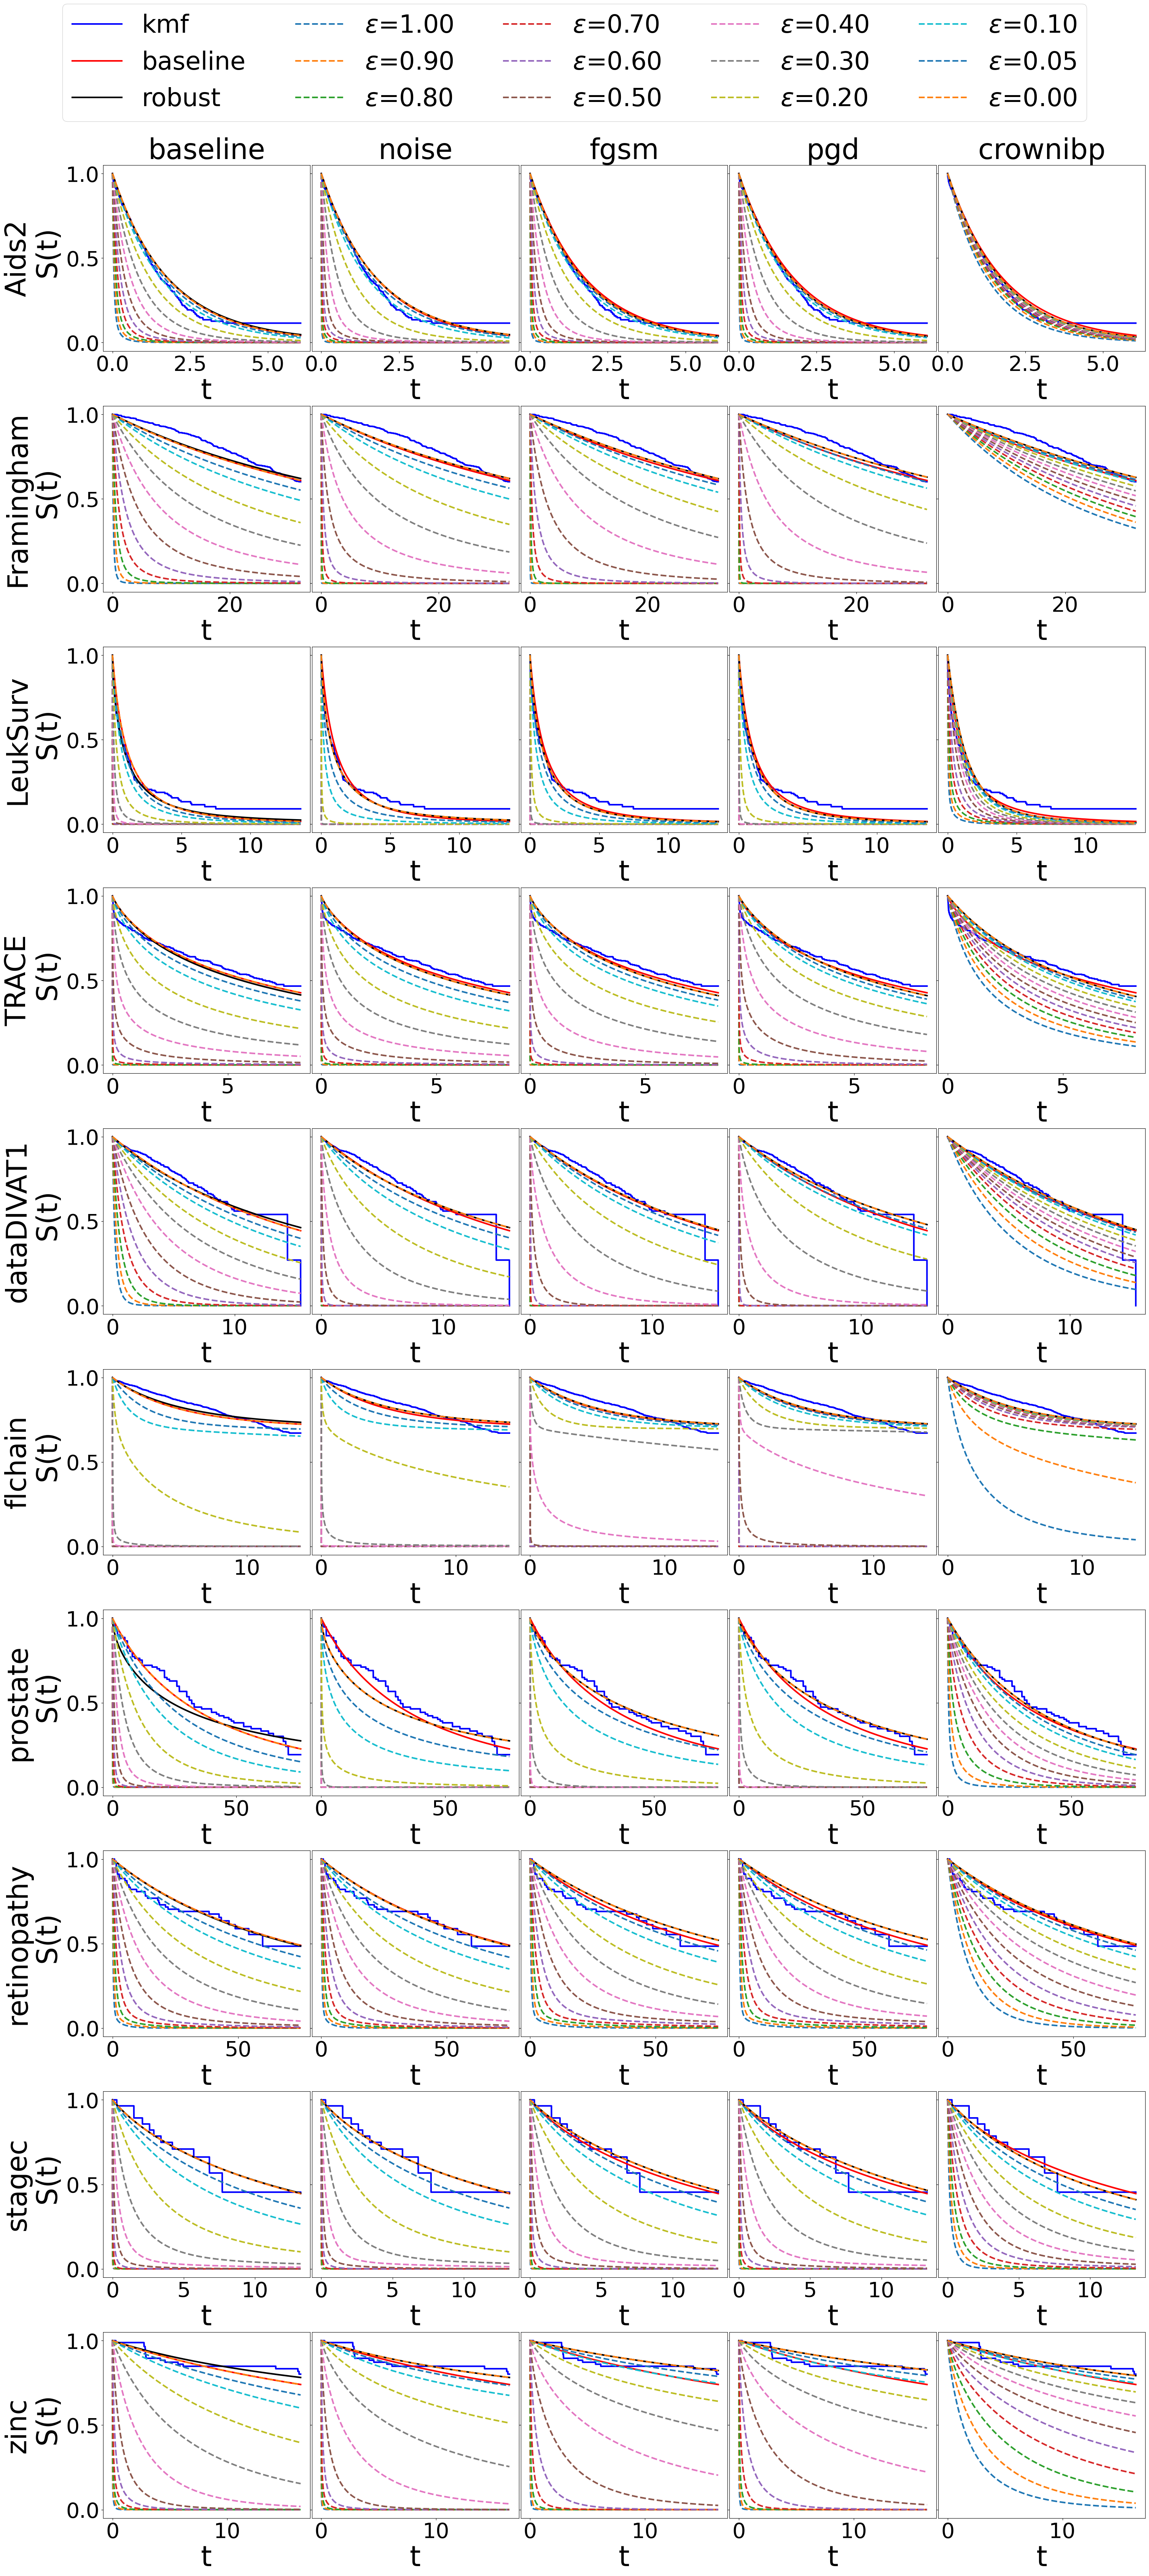

In [55]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves.pdf")

fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,64),sharey=True)

SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title


for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]

        # print(base_models)
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"{dataset}\n S(t)" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=SMALL_SIZE//1.5)


labels = base_models.columns.tolist() + robust_df.columns.tolist()
fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=5,fontsize=30,bbox_to_anchor=(.5,1.06),prop={'size':SMALL_SIZE//1.7}) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

In [43]:
files[[-7,-2,-1],:]

array([['results\\crownibp\\results_noise\\TRACE\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_fgsm\\TRACE\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_pgd\\TRACE\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_crownibp\\TRACE\\population_curves_attacked_test.xlsx'],
       ['results\\crownibp\\results_noise\\stagec\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_fgsm\\stagec\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_pgd\\stagec\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_crownibp\\stagec\\population_curves_attacked_test.xlsx'],
       ['results\\crownibp\\results_noise\\zinc\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_fgsm\\zinc\\population_curves_attacked_test.xlsx',
        'results\\crownibp\\results_pgd\\zinc\\population_curves_attacked_test.xlsx',
        'results\\cro

0 0


IndexError: list index out of range

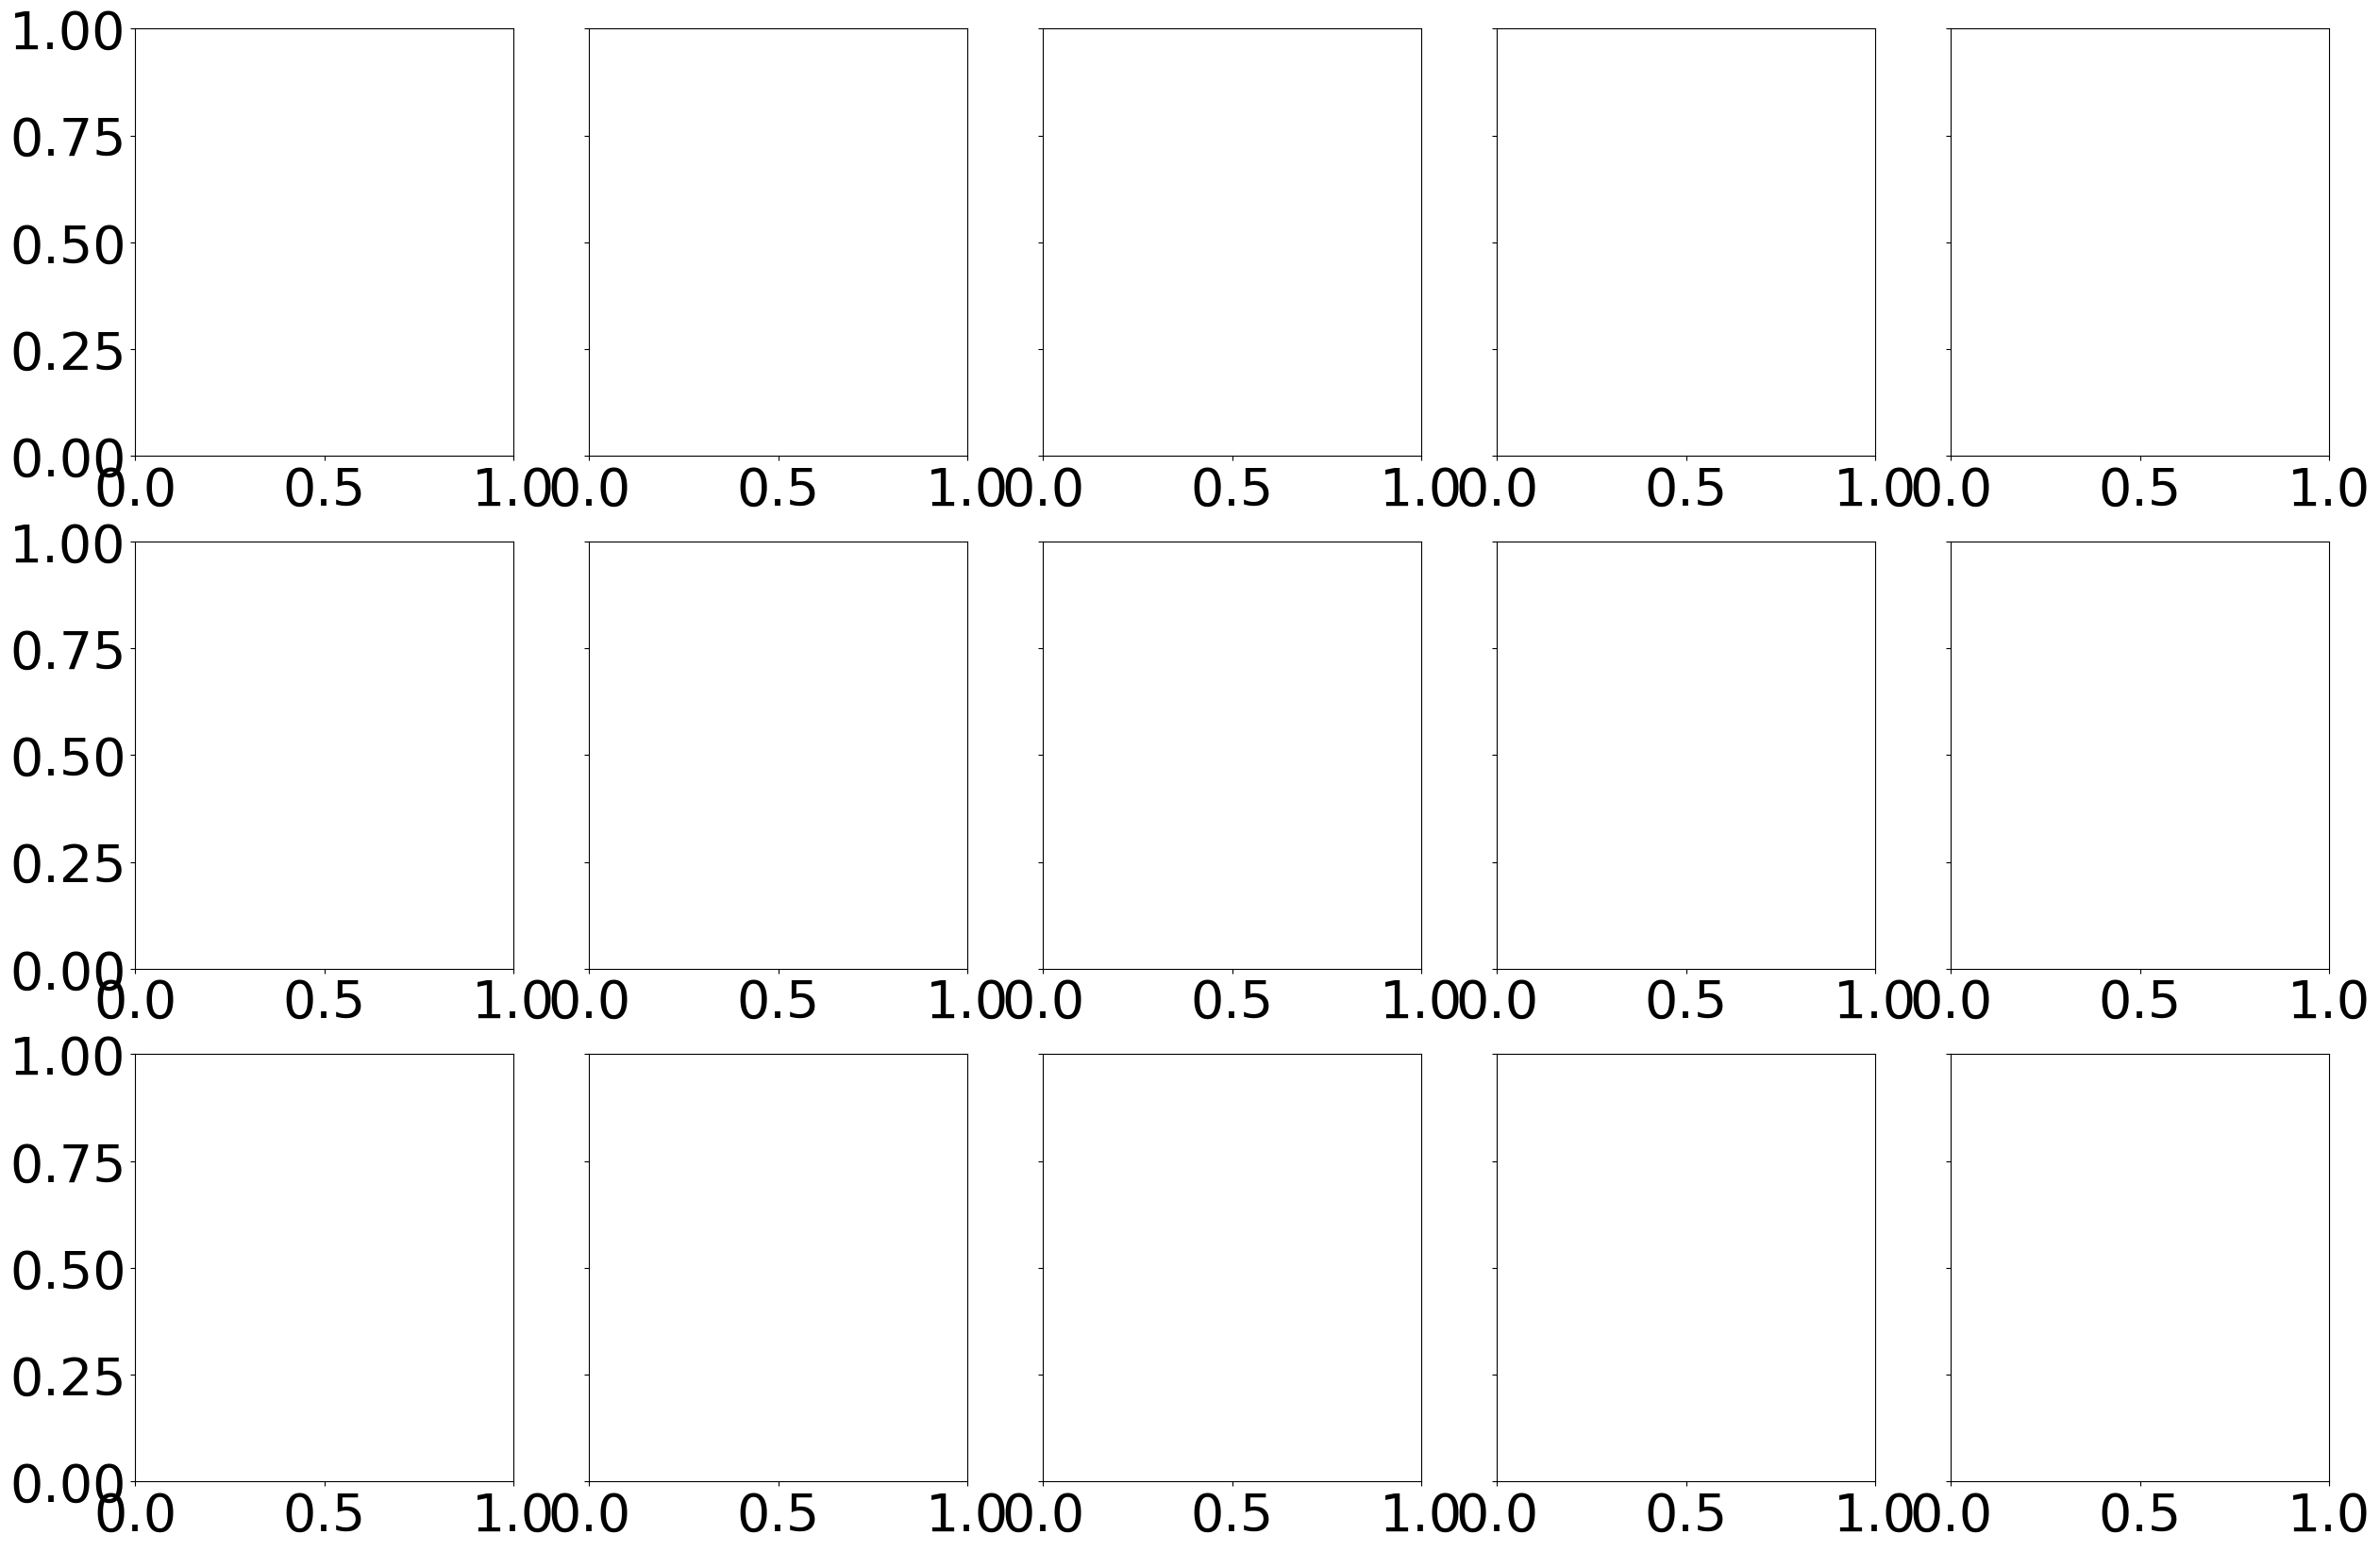

In [35]:
save_folder = results_folder = os.path.join(r"C:\Users\lpott\OneDrive\Documents\Northeastern University\Classes\EECE 7398 Verifiable Machine Learning\EECE7398_Final_Project\results",attack,"perturb_curves_subset.pdf")
file_subset = files[[-7,-2,-1],:]

fig,axes = plt.subplots(3,n_cols+1,figsize=(30,20),sharey=True)


SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title

for i in range(3):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        if dataset not in ["TRACE","stagec","zinc"]:
            continue
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        df_population= df_population.iloc[:,3:]

        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in robust_df.columns]
        baseline_df.columns = ["$\epsilon$={:.2f}".format(eval(col.split("=")[1])) for col in baseline_df.columns]
        
        base1 = axes[i][j+1].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
        base2 = axes[i][j+1].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
        base3 = axes[i][j+1].plot(t,base_models.iloc[:,2],linewidth=3,c="k")

  
        robust1 = axes[i][j+1].plot(t,robust_df,'--',linewidth=3)
  
        if j == 0:
            base1 = axes[i][j].plot(t,base_models.iloc[:,0],linewidth=3,c="b")
            base2 = axes[i][j].plot(t,base_models.iloc[:,1],linewidth=3,c="r")
            base3 = axes[i][j].plot(t,base_models.iloc[:,2],linewidth=3,c="k")
            baseline1 = axes[i][j].plot(t,baseline_df,'--',linewidth=3)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=SMALL_SIZE//1.5)


labels = base_models.columns.tolist() + robust_df.columns.tolist()
fig.legend([base1, base2,base3,robust1], labels=labels, 
           loc="upper center",ncols=6,fontsize=30,bbox_to_anchor=(.5,1.11),prop={'size':SMALL_SIZE}) 

# axes[0][3].legend(base_models.columns.tolist() + robust_df.columns.tolist(),fontsize=20,ncol=2,loc=1)

# plt.legend(base_models.columns.tolist() + robust_df.columns.tolist(),loc='upper center',ncol=5)
plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

### DIST PLOTS

In [24]:
# CI , IBS , NegLL
results_folder = fr"results\{attack}"
img_name = "curve_distributions_test"

 # aggregate all the CI files
os.listdir(results_folder)
excels = []
for folder in os.listdir(results_folder):
    glob_search = os.path.join(results_folder,folder,"*",f"{img_name}.xlsx")
    excels.extend(glob.glob(glob_search))

for dataset in exclude_datasets:
    for exceli in excels:
        if dataset in exceli:
            print("remove ",dataset)
            excels.remove(exceli)

In [25]:
excels = np.sort(excels)
files = pd.DataFrame(excels.reshape(-1,len(algorithms)-1,order="F"),columns=["crownibp","fgsm","noise","pgd"]).reindex(["noise","fgsm","pgd","crownibp"],axis=1).values

In [26]:
save_folder = results_folder = os.path.join(r"results",attack,"dist_curves.pdf")

In [27]:
import seaborn as sns

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
7 0
7 1
7 2
7 3
8 0
8 1
8 2
8 3
9 0
9 1
9 2
9 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_24972\2481826071.py:57: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mu,q95,q05], labels=labels,


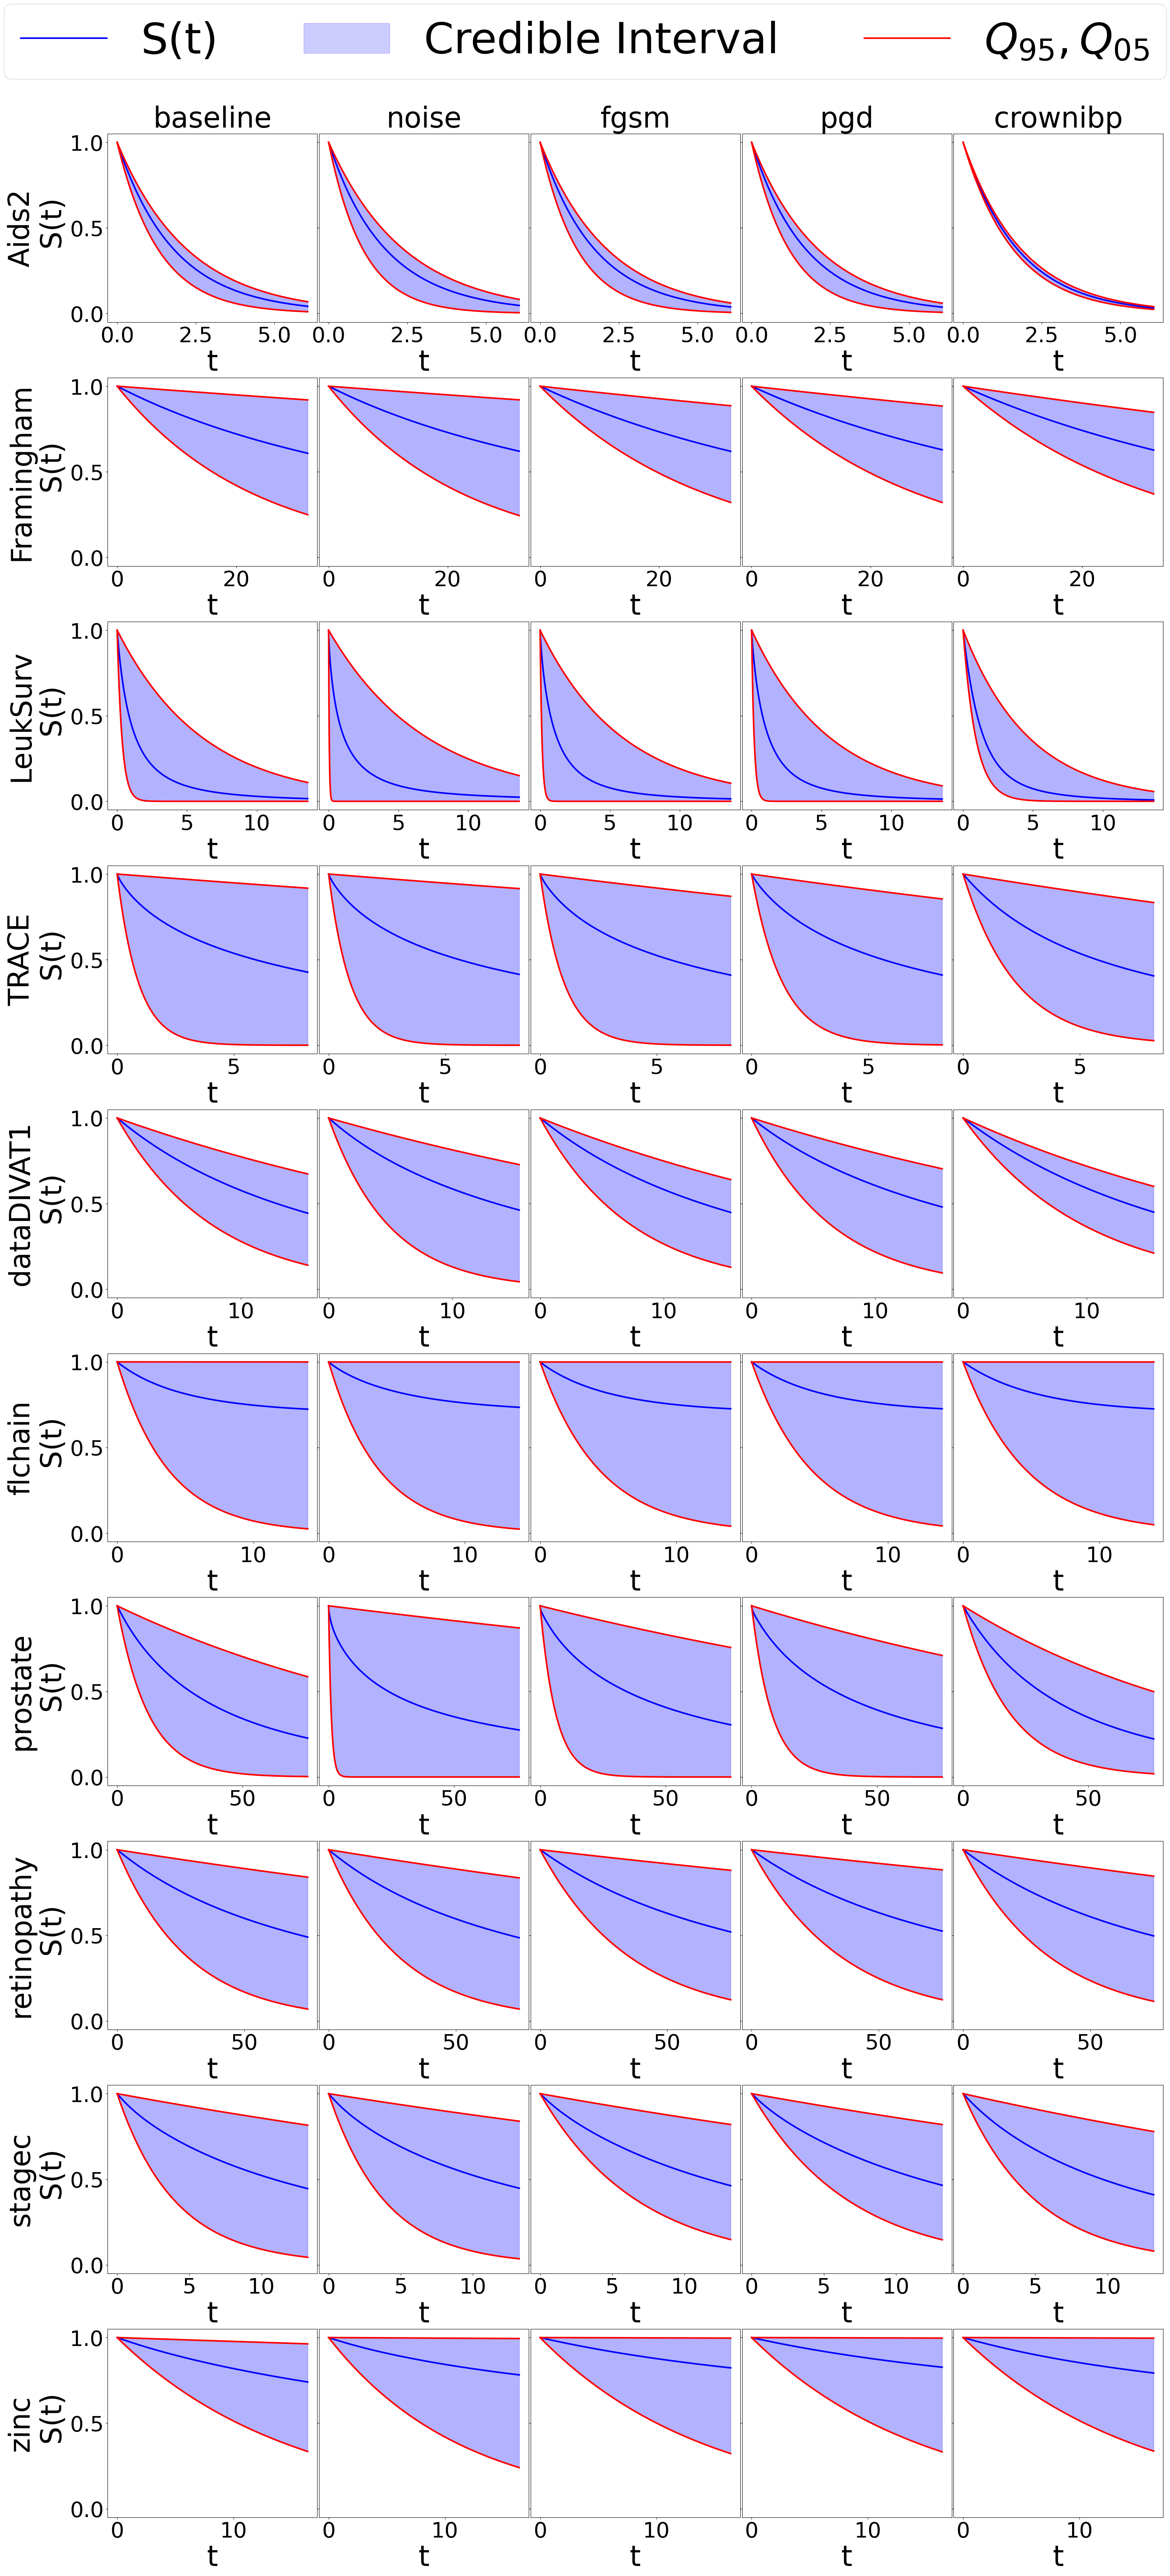

In [36]:
fig,axes = plt.subplots(n_rows,n_cols+1,figsize=(30,64),sharey=True)

SMALL_SIZE = 80
plt.rc('xtick', labelsize=SMALL_SIZE//2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE//2)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title


for i in range(n_rows):
    for j in range(n_cols):
        print(i,j)
        fileij = files[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        axes[i][j+1].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"{dataset}\n S(t)" ,fontsize=SMALL_SIZE//1.5)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=SMALL_SIZE//1.5)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=SMALL_SIZE//1.5)

labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.05),prop={'size':SMALL_SIZE}) 

plt.tight_layout(pad=0)
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3


C:\Users\lpott\AppData\Local\Temp\ipykernel_27052\2408430024.py:54: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([mu,q95,q05], labels=labels,


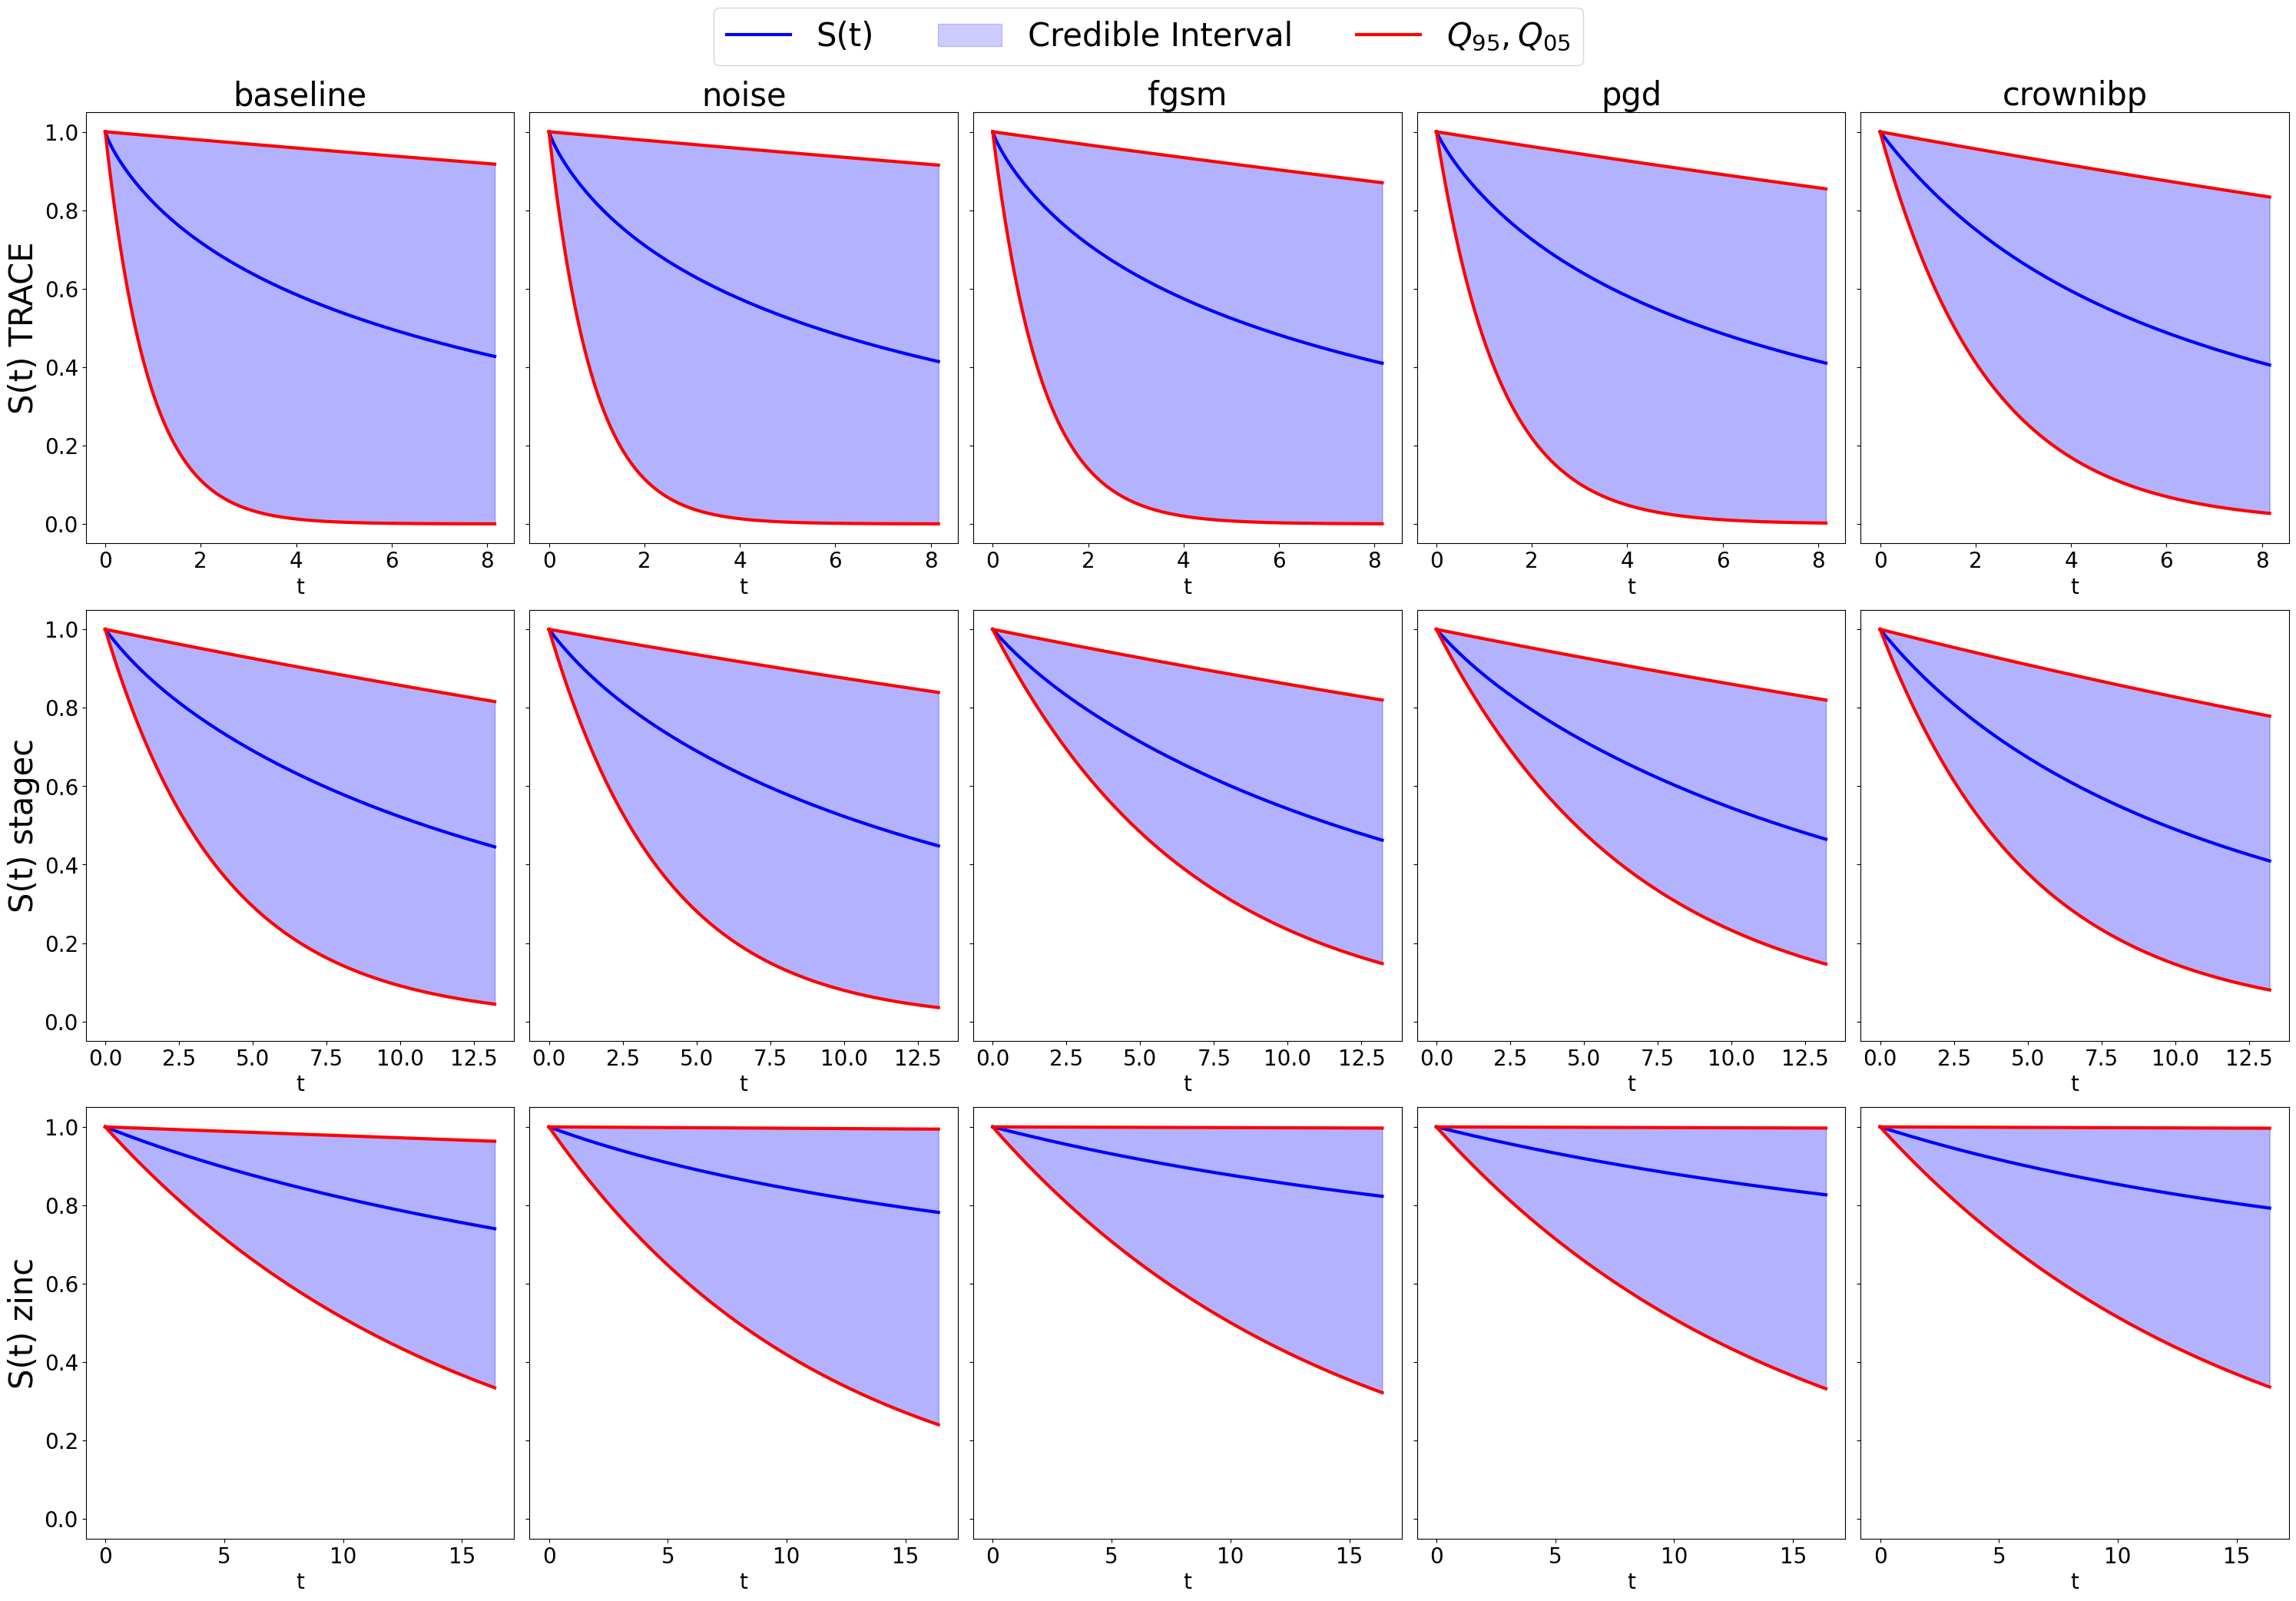

In [50]:
save_folder = results_folder = os.path.join(r"results",attack,"dist_curves_subset.pdf")
file_subset = files[[-7,-2,-1],:]

fig,axes = plt.subplots(3,n_cols+1,figsize=(30,20),sharey=True)

SMALL_SIZE = 20
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

for i in range(3):
    for j in range(n_cols):
        print(i,j)
        fileij = file_subset[i][j]
        algo,dataset = fileij.split("\\")[-3:-1]
        algo = re.sub("results_","",algo)

        df_population = pd.read_excel(fileij)

        t = df_population.pop("t")
        base_models = df_population.iloc[:,:3]
        base_models.columns = [col.split("_")[0] for col in base_models.columns]
        
        robust_idx = ["robust" in col for col in df_population.columns]
        baseline_idx = ["baseline" in col for col in df_population.columns]
        robust_df = df_population.iloc[:,robust_idx]
        baseline_df = df_population.iloc[:,baseline_idx]
        
        robust_df.columns = [col.split("_")[1] for col in robust_df.columns]
        baseline_df.columns =[col.split("_")[1] for col in baseline_df.columns]
        
        mu = sns.lineplot(x=t, y=robust_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j+1],c='b',legend=False)
        q95 = sns.lineplot(x=t, y=robust_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        q05 = sns.lineplot(x=t, y=robust_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j+1],c='r',legend=False)
        axes[i][j+1].set_xlabel("t",fontsize=20)

        line = q05.get_lines()
        axes[i][j+1].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
        if j == 0:
            mu = sns.lineplot(x=t, y=baseline_df.iloc[:,0], label='Average S(t)', linewidth=3.0, ax=axes[i][j],c='b',legend=False)
            q95 = sns.lineplot(x=t, y=baseline_df.iloc[:,1], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)
            q05 = sns.lineplot(x=t, y=baseline_df.iloc[:,2], label='Confidence', linewidth=3.0, ax=axes[i][j],c='r',legend=False)

            axes[i][j].set_ylabel(f"S(t) {dataset}" ,fontsize=30)
            axes[i][j].set_xlabel("t",fontsize=20)
            line = q05.get_lines()
            axes[i][j].fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='blue', alpha=.3)
            axes[i][j].set_xlabel("t",fontsize=20)

for ax, col in zip(axes[0], algorithms):
    ax.set_title(col,fontsize=30)


labels = ["S(t)","Credible Interval","$Q_{95},Q_{05}$"]
fig.legend([mu,q95,q05], labels=labels, 
           loc="upper center",ncols=4,fontsize=30,bbox_to_anchor=(.5,1.05)) 

plt.tight_layout()
plt.savefig(save_folder,dpi=1600,bbox_inches="tight")
plt.show()